In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.display.max_columns=60



In [7]:
paymentDict = { 
    2601001: 'Insurance',
    2601003: 'Medicaid',
    2601005: 'Medicare',
    2601007: 'Not Billed (for any reason)',
    2601009: 'Other Government',
    2601011: 'Self Pay',
    2601013: 'Workers Compensation',
    2601015: 'Payment by Facility',
    2601017: 'Contracted Payment',
    2601019: 'Community Network',
    2601021: 'No Insurance Identified',
    2601023: 'Other Payment Option',
    7701003: 'Not Recorded',
    7701001: 'Not Applicable'
}

callDict = {
    2301001: 'Abdominal Pain/Problems',
    2301003: 'Allergic Reaction/Stings',
    2301005: 'Animal Bite',
    2301007: 'Assault',
    2301009: 'Automated Crash Notification',
    2301011: 'Back Pain (Non-Traumatic)',
    2301013: 'Breathing Problem',
    2301015: 'Burns/Explosion',
    2301017: 'Carbon Monoxide/Hazmat/Inhalation/CBRN',
    2301019: 'Cardiac Arrest/Death',
    2301021: 'Chest Pain (Non-Traumatic)',
    2301023: 'Choking',
    2301025: 'Convulsions/Seizure',
    2301027: 'Diabetic Problem',
    2301029: 'Electrocution/Lightning',
    2301031: 'Eye Problem/Injury',
    2301033: 'Falls',
    2301035: 'Fire',
    2301037: 'Headache',
    2301039: 'Healthcare Professional/Admission',
    2301041: 'Heart Problems/AICD',
    2301043: 'Heat/Cold Exposure',
    2301045: 'Hemorrhage/Laceration',
    2301047: 'Industrial Accident/Inaccessible Incident/Other Entrapments (Non-Vehicle)',
    2301049: 'Medical Alarm',
    2301051: 'No Other Appropriate Choice',
    2301053: 'Overdose/Poisoning/Ingestion',
    2301055: 'Pandemic/Epidemic/Outbreak',
    2301057: 'Pregnancy/Childbirth/Miscarriage',
    2301059: 'Psychiatric Problem/Abnormal Behavior/Suicide Attempt',
    2301061: 'Sick Person',
    2301063: 'Stab/Gunshot Wound/Penetrating Trauma',
    2301065: 'Standby',
    2301067: 'Stroke/CVA',
    2301069: 'Traffic/Transportation Incident',
    2301071: 'Transfer/Interfacility/Palliative Care',
    2301073: 'Traumatic Injury',
    2301075: 'Well Person Check',
    2301077: 'Unconscious/Fainting/Near-Fainting',
    2301079: 'Unknown Problem/Person Down',
    2301081: 'Drowning/Diving/SCUBA Accident',
    2301083: 'Airmedical Transport',
    2301085: 'Altered Mental Status',
    2301087: 'Intercept',
    2301089: 'Nausea',
    2301091: 'Vomiting',
    2301093: 'Hanging/Strangulation/Asphyxiation',
    2301095: 'Intoxicated Subject',
    2301097: 'EMS Requested by Law Enforcement',
    2301099: 'Active Shooter'
}

paymentDict[7701003]
callDict[2301061]

'Sick Person'

The following codeblock is a systematic way to load data for all of the counties. Simply changing 'DIR' to a file path from your CWD to where all the unzipped county files will allow this to run on your computer. Since this is loading lots of data in, this block takes a while to run.

In [2]:
import os, os.path


DIR = 'data'  #this is a folder which has all the (unzipped) files for each county, downloaded from dropbox
counties = [name for name in os.listdir('data')]     #this is an array of all the files in DIR, each file is folder containing the files for a county
countyDFs = [] #this will be an array of dfs, each df corresponds to one county

print(counties[0][13:18]) #this is how to get the actual name of the county from the file

for county in counties:
    #each county file consists of many little files, each containing a few rows (I think?)
    #this reads all the names of those files, turns each into a df, adds it to L

    countyFiles = [name for name in os.listdir('data/' + county)]
    L = []
    for file in countyFiles:
        
        L.append(pd.read_parquet(DIR + '/' + county + '/' + file))

    #glue all the rows of this county into one big df and add it to our list of countyDFs
    countyDFs.append(pd.concat(L).reset_index())



0J6B5


In [3]:
#fix the formats of the date column in each county
#add columns for response time, day of year, weeknum, and week day
for df in countyDFs:
    df['Notified']=pd.to_datetime(df['eTimes_03'], format='%d%b%Y:%H:%M:%S',exact=False, errors='coerce')
    df['ArrivedAtScene']=pd.to_datetime(df['eTimes_06'], format='%d%b%Y:%H:%M:%S',exact=False, errors='coerce')
    df['ArrivedAtPatient']=pd.to_datetime(df['eTimes_07'], format='%d%b%Y:%H:%M:%S',exact=False, errors='coerce')
    
    df['DayOfYear']=df.Notified.dt.dayofyear
    
    df['WeekNum']=df.Notified.apply(lambda x: x.isocalendar().week)
    df['WeekDay']=df.Notified.dt.dayofweek

    df['ResponseTime'] = df['ArrivedAtScene'] - df['Notified']                      #the type of this is 'deltaTime', which can't really be graphed
    df['ResponseTimeMinutes'] = df['ResponseTime'].apply(lambda x: x.seconds/60)    #this is a float for the number of minutes, which can be graphed
    df['ResponseTimeMinutes'] = df['ResponseTimeMinutes'].fillna(0)                 #this fills missing entries with a 0, otherwise they will be nans and cause problems

countyDFs[1].head()

,__null_dask_index__,PcrKey,eDispatch_01,eDispatch_02,eArrest_14,eArrest_01,eArrest_02,eArrest_05,eArrest_07,eArrest_11,eArrest_16,eArrest_18,eDisposition_12,eDisposition_19,eDisposition_16,eDisposition_21,eDisposition_22,eDisposition_23,eOutcome_01,eOutcome_02,ePatient_13,ePatient_15,ePatient_16,ePayment_01,ePayment_50,eResponse_05,eResponse_07,eResponse_15,eResponse_23,eScene_01,...,eScene_07,eScene_08,eScene_09,eSituation_02,eSituation_07,eSituation_08,eSituation_13,eSituation_01,eTimes_01,eTimes_03,eTimes_05,eTimes_06,eTimes_07,eTimes_09,eTimes_11,eTimes_12,eTimes_13,eDisposition_17,year_x,Masked_DestinationCounty,year_y,Masked_DestinationState,Notified,ArrivedAtScene,ArrivedAtPatient,DayOfYear,WeekNum,WeekDay,ResponseTime,ResponseTimeMinutes
0,0,169609585.0,2301071,2302007,Not Applicable,3001001,7701001,7701001,7701001,7701001,7701001,7701001,4212033,4219005,4216005,4221013,7701001,7701001,7701001,7701001,9906003,53.0,2516009,2601021,2650001,2205005,2207003,2215013,2223001,9923003,...,7701001,7701001,Y92.23,7701001,2807015,2808001,2813005,Not Applicable,Not Applicable,01JAN2022:06:58:10,01JAN2022:07:01:38,01JAN2022:07:12:35,01JAN2022:07:18:35,01JAN2022:07:23:24,01JAN2022:07:40:11,01JAN2022:07:50:43,01JAN2022:07:54:15,4217005,2022,0JTMM,2022,AOILO,2022-01-01 06:58:10,2022-01-01 07:12:35,2022-01-01 07:18:35,1,52,5,0 days 00:14:25,14.416667
1,1,169609607.0,2301061,2302001,Not Applicable,3001001,7701001,7701001,7701001,7701001,7701001,7701001,4212033,4219005,4216005,4221003,7701001,9908007,7701003,7701003,9906001,77.0,2516009,7701003,7701003,2205001,2207003,2215013,2223001,7701003,...,9923001,7701003,Y92.0,9922001,2807011,2808011,2813005,02JAN2022:12:41:40,02JAN2022:12:41:10,02JAN2022:12:41:40,02JAN2022:12:44:01,02JAN2022:12:54:10,02JAN2022:12:55:00,02JAN2022:13:03:14,02JAN2022:13:21:23,02JAN2022:13:30:26,02JAN2022:13:40:26,4217005,2022,0JTMM,2022,AOILO,2022-01-02 12:41:40,2022-01-02 12:54:10,2022-01-02 12:55:00,2,52,6,0 days 00:12:30,12.500000
2,2,169609609.0,2301059,2302007,Not Applicable,3001001,7701001,7701001,7701001,7701001,7701001,7701001,4212033,4219005,4216005,4221003,7701001,9908007,7701003,7701001,9906001,24.0,2516009,2601021,2650003,2205001,2207003,2215013,2223001,9923001,...,9923001,7701001,Y92.48,9922001,2807011,2808001,2813005,Not Applicable,01JAN2022:01:20:28,01JAN2022:01:21:36,01JAN2022:01:24:13,01JAN2022:01:30:24,01JAN2022:01:33:24,01JAN2022:01:46:40,01JAN2022:01:56:48,01JAN2022:02:11:36,01JAN2022:02:18:13,4217005,2022,0JTMM,2022,AOILO,2022-01-01 01:21:36,2022-01-01 01:30:24,2022-01-01 01:33:24,1,52,5,0 days 00:08:48,8.800000
3,3,169609637.0,2301061,2302001,Not Applicable,3001001,7701001,7701001,7701001,7701001,7701001,7701001,4212033,4219003,4216005,4221003,7701001,7701003,7701003,7701003,9906003,84.0,2516009,7701003,7701003,2205001,2207003,2215013,2223001,7701003,...,9923001,7701003,Y92.0,9922001,2807011,2808011,2813003,01JAN2022:01:00:00,01JAN2022:00:43:00,01JAN2022:00:44:00,01JAN2022:00:47:00,01JAN2022:01:00:00,01JAN2022:01:02:00,01JAN2022:01:09:00,01JAN2022:01:32:00,01JAN2022:01:39:00,01JAN2022:01:54:00,4217005,2022,0JTMM,2022,AOILO,2022-01-01 00:44:00,2022-01-01 01:00:00,2022-01-01 01:02:00,1,52,5,0 days 00:16:00,16.000000
4,4,169609665.0,2301051,7701003,Not Applicable,3001001,7701001,7701001,7701001,7701001,7701001,7701001,4212033,4219005,4216005,4221003,7701001,7701003,7701003,7701003,9906003,62.0,2516009,7701003,7701003,2205005,2207003,2215013,2223005,7701003,...,9923001,7701003,Y92.23,9922001,2807013,2808017,2813005,01JAN2022:22:48:00,01JAN2022:22:48:00,01JAN2022:22:48:00,01JAN2022:22:53:00,01JAN2022:22:57:00,01JAN2022:22:59:00,01JAN2022:23:11:00,01JAN2022:23:47:00,01JAN2022:23:59:00,02JAN2022:00:20:00,4217005,2022,0JTMM,2022,AOILO,2022-01-01 22:48:00,2022-01-01 22:57:00,2022-01-01 22:59:00,1,52,5,0 days 00:09:00,9.000000


In [4]:
for i in range(len(countyDFs)):
    df = countyDFs[i]
    print(counties[i][13:18])
    print('Total rows: ' + str(df.shape[0]) + '   Missing values: ' + str(df['Notified'].isnull().sum()) + ', ' + str(df['ArrivedAtScene'].isnull().sum()) + ', ' + str(df['ArrivedAtPatient'].isnull().sum()))

0J6B5
Total rows: 1905   Missing values: 0, 1, 2
0JTMM
Total rows: 32512   Missing values: 0, 2, 22
0WMQN
Total rows: 925   Missing values: 0, 0, 38
17KD6
Total rows: 3151   Missing values: 0, 0, 2
19QPJ
Total rows: 28723   Missing values: 0, 1, 198
1G2WA
Total rows: 1363   Missing values: 0, 0, 0
237QT
Total rows: 2603   Missing values: 0, 0, 0
2SIWI
Total rows: 480   Missing values: 0, 0, 0
2WPFE
Total rows: 5094   Missing values: 0, 0, 8
374WX
Total rows: 3426   Missing values: 0, 2, 2
4EJ1G
Total rows: 6023   Missing values: 0, 4, 25
4HFAB
Total rows: 6558   Missing values: 0, 0, 20


Notified is always filled out, ArrivedAtScene is almost always filled out, and ArrivedAtPatient is the least likely to be filled out. 

Therefore, calculating 'response time' from ArrivedAtScene - Notified is a reasonable choice.


C:\Users\User\AppData\Local\Temp\ipykernel_4692\3841768521.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


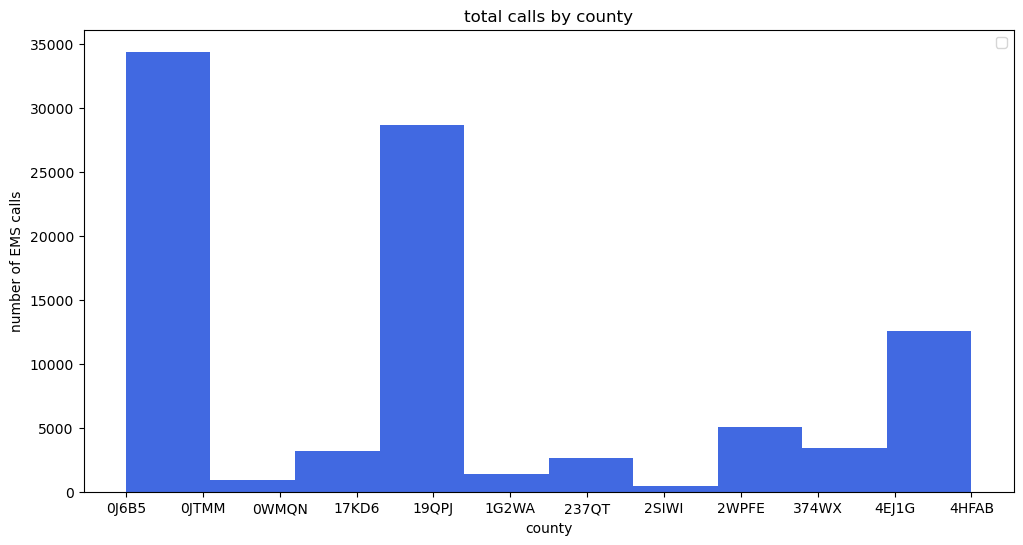

In [5]:
#It would appear that the pink and blue don't mean anything, and rather that these columns simply represent the total number of calls in each county.

xi_calls = []

for county in countyDFs:
    xi_calls.append(county.loc[(county.eDispatch_02 != 'abc'),'Masked_DestinationCounty'])
    #xi_nodispatch.append(county.loc[(county.eDispatch_02=='2302001'),'Masked_DestinationCounty'])

xi_calls = pd.concat(xi_calls)

plt.figure(figsize=(12,6))
plt.title("total calls by county")
plt.ylabel('number of EMS calls')
plt.xlabel('county')
plt.hist([xi_calls], histtype='bar', color=['royalblue'])
plt.legend()
plt.show()


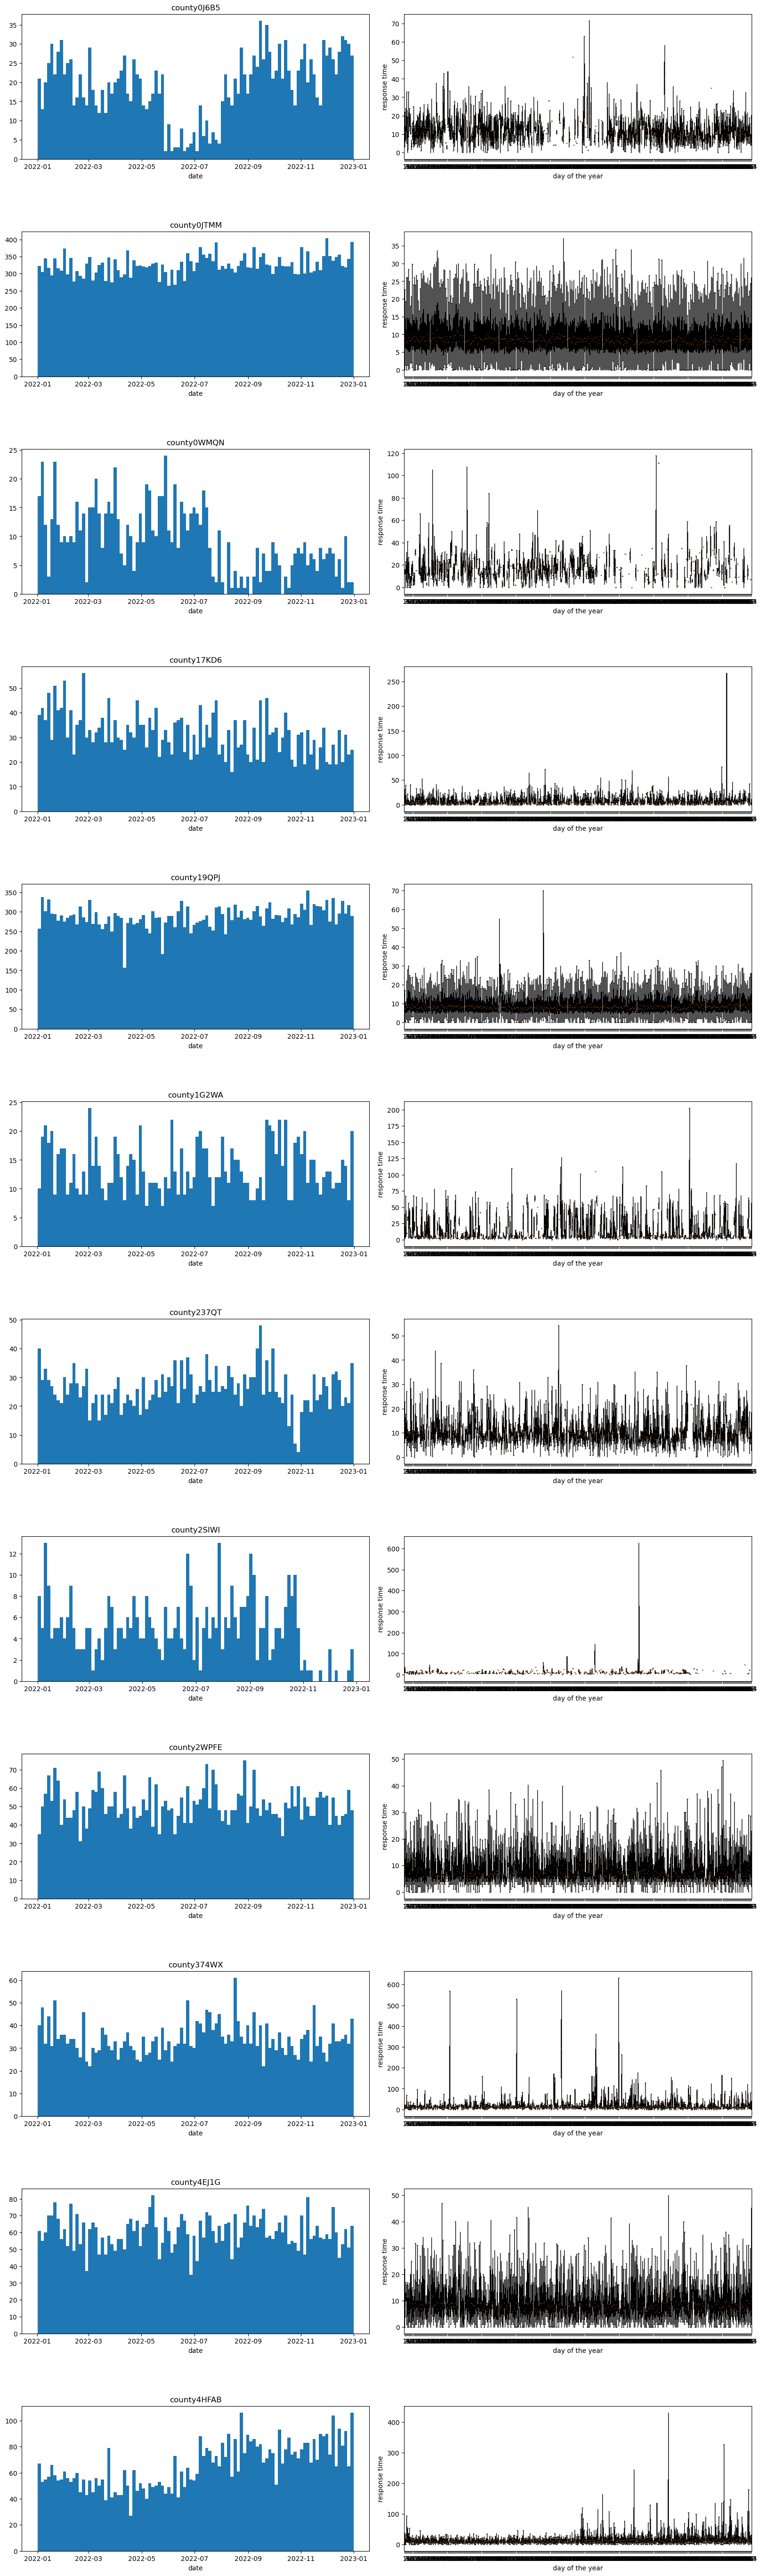

In [9]:

#For some reason this block takes several minutes to run
fig, axs = plt.subplots(len(countyDFs),2,figsize = (20,70))
plt.subplots_adjust(wspace=0.10, hspace=.5)


for i in range(len(countyDFs)):
    county = countyDFs[i]

    Responsedata = [county.loc[(county.DayOfYear == day), 'ResponseTimeMinutes'].values for day in range(1,365)]    #data is an array of length 365 where each day is the response times for that day
    Calldata = county['Notified']

    axs[i,0].hist(Calldata,bins = 100, histtype = 'bar')
    axs[i,0].set_xlabel('date')
    axs[i,0].set_title('county' + counties[i][13:18])

    axs[i,1].boxplot(Responsedata, showfliers = False) #Most counties have some extreme outliers which makes the plot not very helpful 
    axs[i,1].set_xlabel('day of the year')
    axs[i,1].set_ylabel('response time')


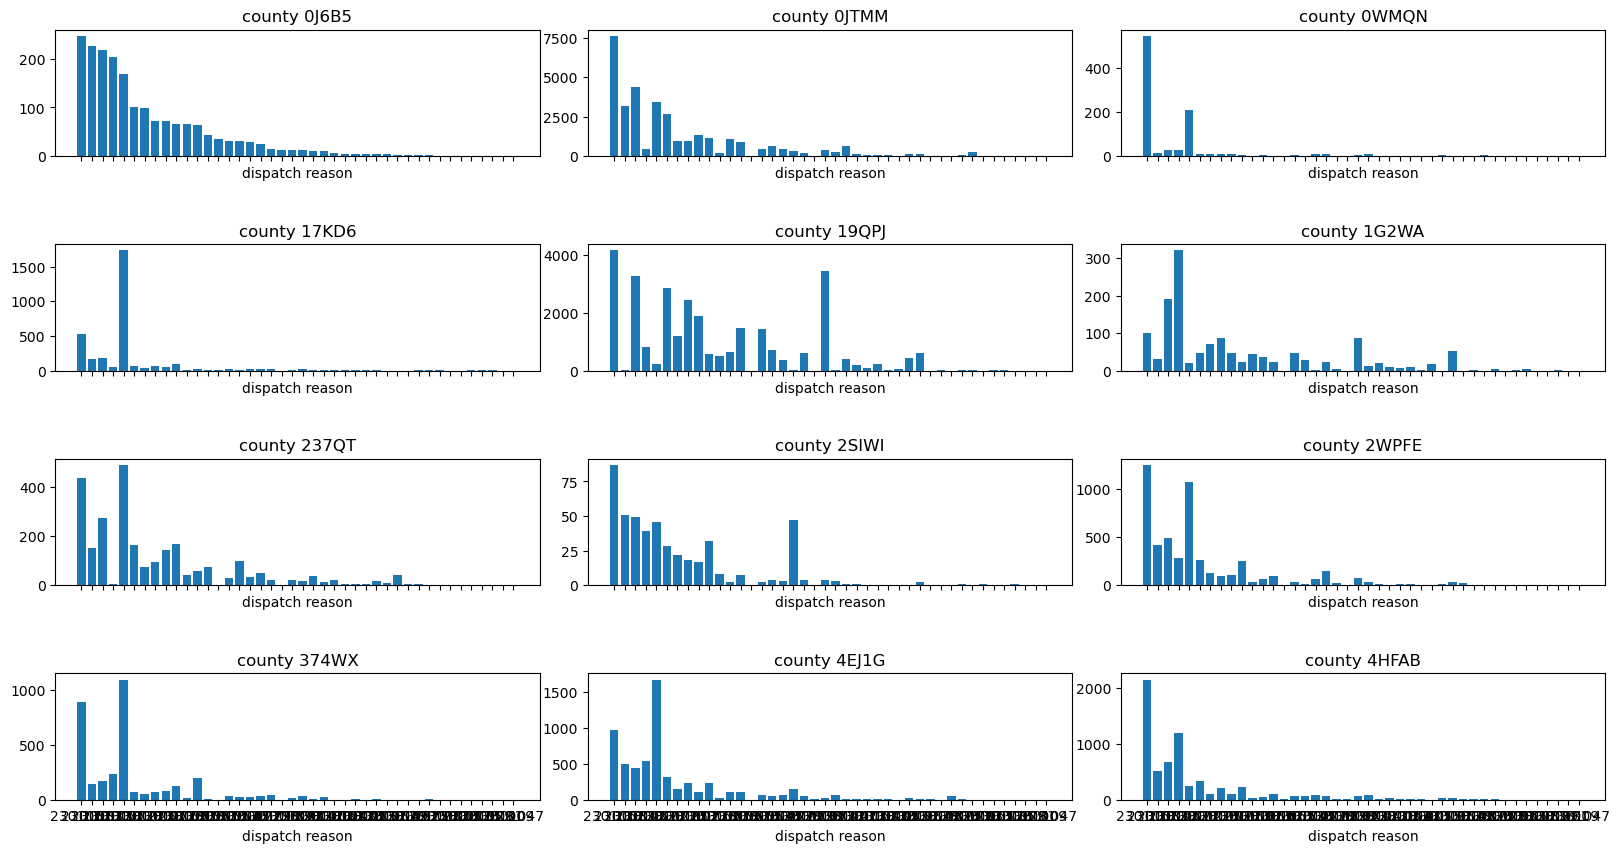

In [10]:
#this repeats the bar chart of call reason/number of calls, but compares different counties
#We can see counties are all quite different
#Note that the y coordinate is not the same for each chart since counties vary widely in total number of calls

fig, axs = plt.subplots((len(countyDFs))//3,3,sharex=True,figsize = (20,10))
plt.subplots_adjust(wspace=0.10, hspace=.7)

countyCounts = []

for county in countyDFs:
    countyCounts.append(county['eDispatch_01'].value_counts())

for i in range(len(countyCounts)):
    x = (i//3)
    y = i%3
    #print(x,y)
    axs[x,y].bar(countyCounts[i].index,countyCounts[i].values)
    axs[x,y].set_xlabel('dispatch reason')
    axs[x,y].set_title('county ' + counties[i][13:18])


Sick Person


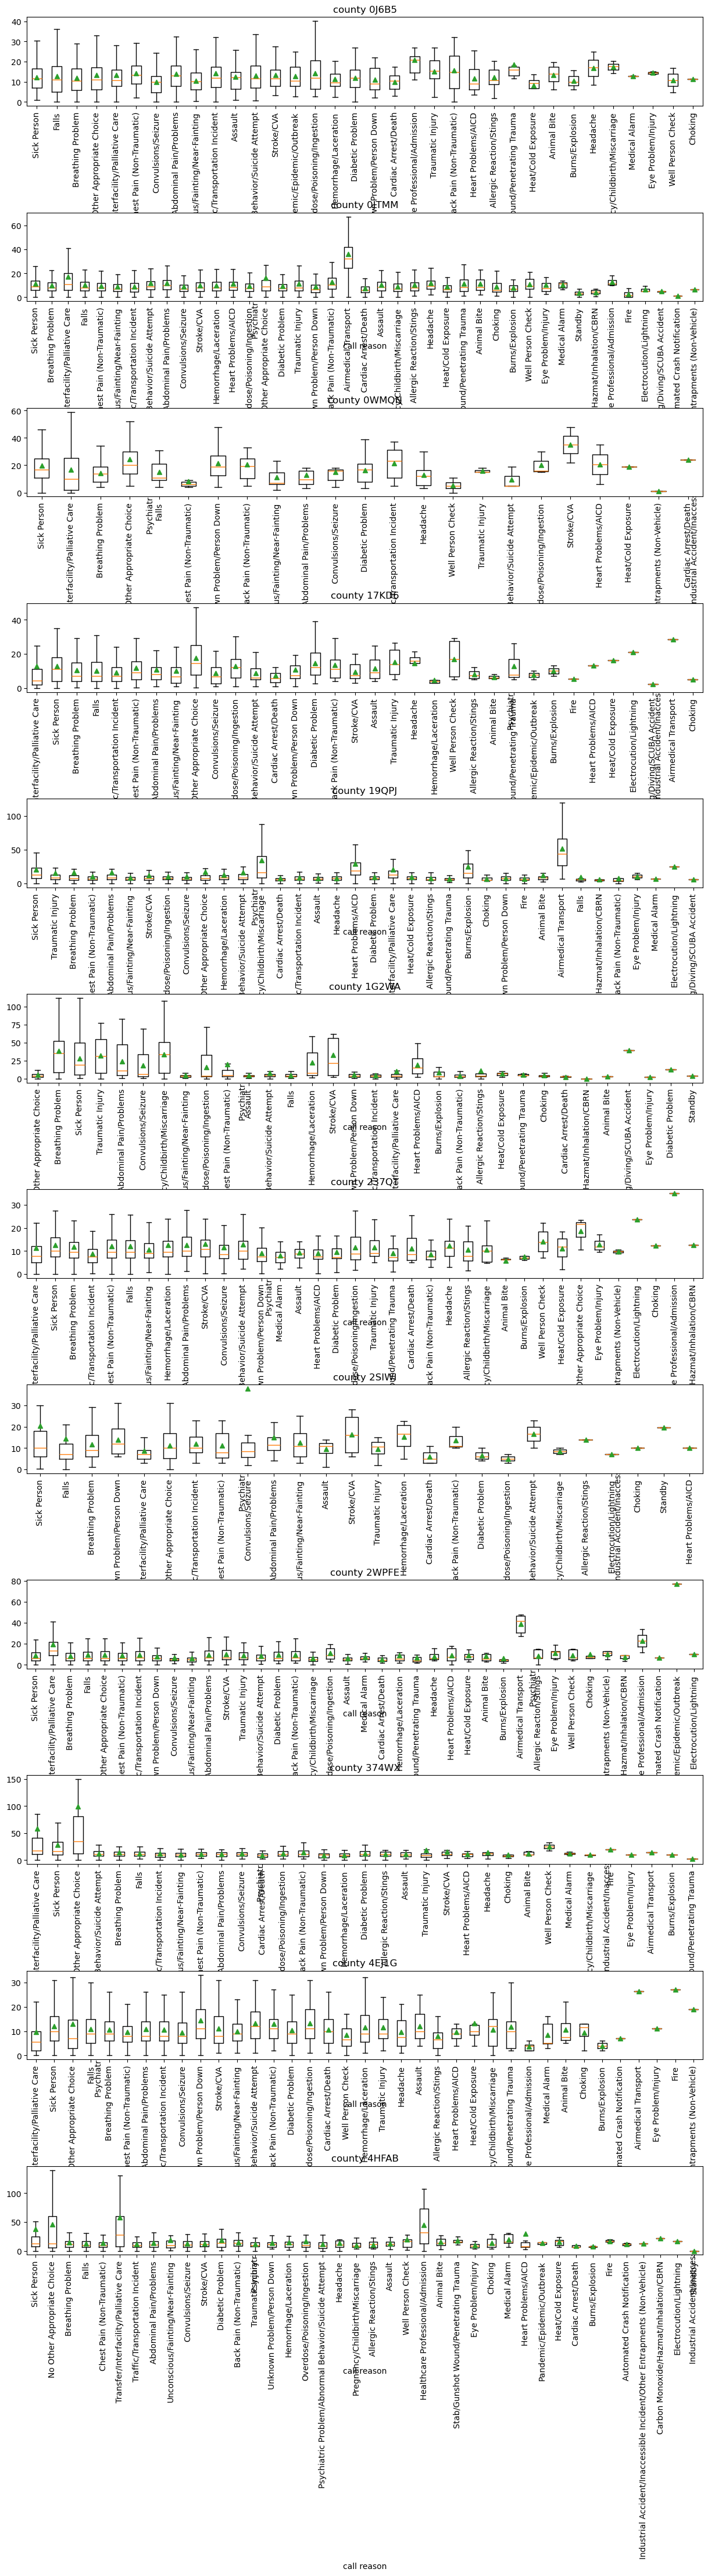

In [12]:
#this repeats the bar chart of call reason/number of calls, but compares different counties
#We can see counties are all quite different
#Note that the y coordinate is not the same for each chart since counties vary widely in total number of calls
#I don't know what from this should inform our analysis, but it's interesting to look at

fig, axs = plt.subplots(len(countyDFs), figsize = (15,50))
plt.subplots_adjust(wspace=0.10, hspace=1.2)

print(callDict[2301061])
countyCounts = []
countyResponses = []
countyLabels = []

for county in countyDFs:
    callTypeData = county['eDispatch_01'].value_counts()
    ResponseData = [county.loc[(county['eDispatch_01'] == code), 'ResponseTimeMinutes'] for code in callTypeData.index] #the i^th entry of this array is the response times for the i^th most common call type for this county
    countyCounts.append(callTypeData)
    countyResponses.append(ResponseData)
    countylabel = [callDict[int(code)] for code in callTypeData.index]
    countyLabels.append(countylabel)

for i in range(len(countyDFs)): 
   axs[i].boxplot(countyResponses[i], showmeans = True, tick_labels = countyLabels[i],showfliers = False)
   axs[i].set_title('county ' + counties[i][13:18])
   axs[i].set_xlabel('call reason')
   axs[i].tick_params(axis='x', labelrotation=90)

#print(countyCounts[0])
#print(countyCounts[0].index)
#print(len(countyResponses[0][0]))
#print(countyLabels[0])


C:\Users\User\AppData\Local\Temp\ipykernel_4692\283930703.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[x,y].set_xticklabels(countyCounts[i].index, rotation = 90)
C:\Users\User\AppData\Local\Temp\ipykernel_4692\283930703.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[x,y].set_xticklabels(countyCounts[i].index, rotation = 90)
C:\Users\User\AppData\Local\Temp\ipykernel_4692\283930703.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[x,y].set_xticklabels(countyCounts[i].index, rotation = 90)
C:\Users\User\AppData\Local\Temp\ipykernel_4692\283930703.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[x,y].set_xticklabels(county

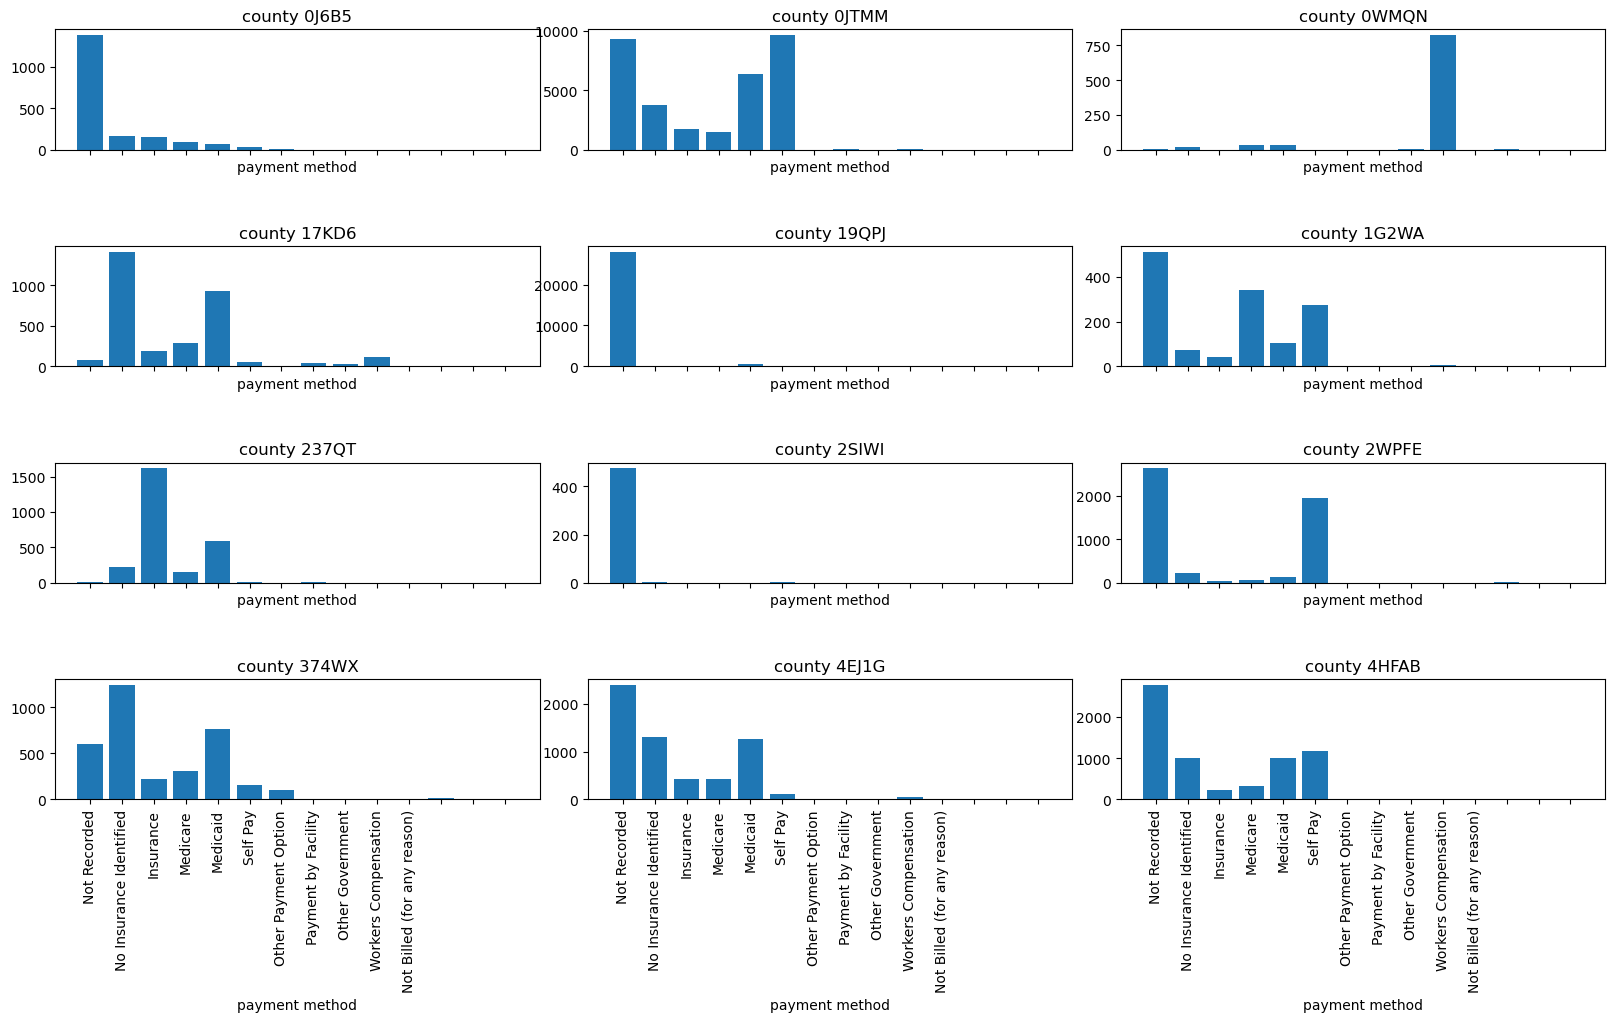

In [13]:
#Same as above, but payment methods across different counties.
#By far the most commmon across all counties is not recorded or no insurance identified, which is to say most of this data is useless

fig, axs = plt.subplots((len(countyDFs))//3,3,sharex=True,figsize = (20,10))
plt.subplots_adjust(wspace=0.10, hspace=.8)

countyCounts = []

for county in countyDFs:
    countyCounts.append(county['ePayment_01'].value_counts())

j = 0
for county in countyCounts:
    paymentTypes = [paymentDict[int(code)] for code in county.index]
    countyCounts[j] = pd.Series(county.values,paymentTypes)
    j += 1

for i in range(len(countyCounts)):
    x = (i//3)
    y = i%3
    #print(x,y)
    axs[x,y].bar(countyCounts[i].index,countyCounts[i].values)
    axs[x,y].set_xlabel('payment method')
    axs[x,y].set_xticklabels(countyCounts[i].index, rotation = 90)
    axs[x,y].set_title('county ' + counties[i][13:18])


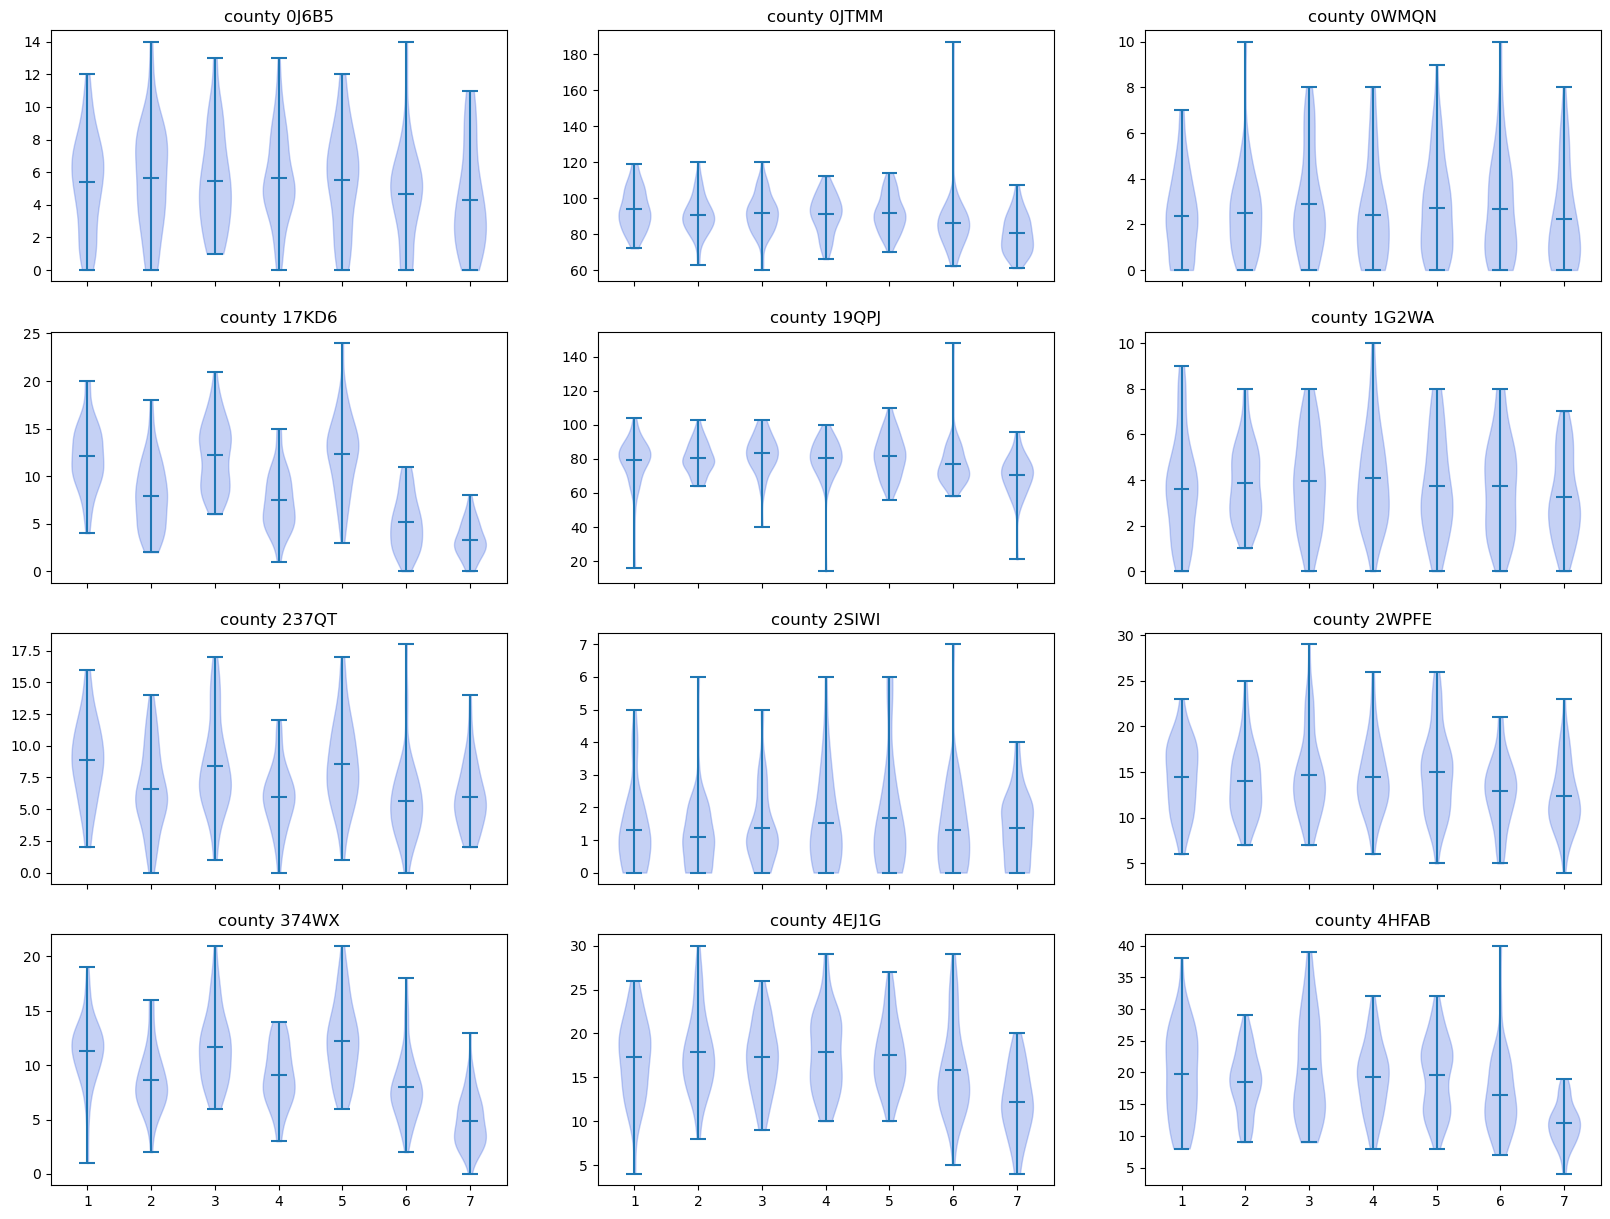

In [15]:
fig, axs = plt.subplots((len(countyDFs))//3,3,sharex=True,figsize = (20,15))
stupid = [0,1,2,3,4,5,6] #why doesn't range(6) = stupid? i don't know


for i in range(len(countyDFs)):
    xcoord = i//3
    ycoord = i%3
    county = countyDFs[i]
    df_w=countyDFs[i].groupby(by='WeekNum').WeekDay.value_counts().unstack() #number of calls each day of the week, one row for each week of the year    
    data = [df_w[weekday].tolist() for weekday in [0,1,2,3,4,5,6]]

    for j in stupid:
        data[j] = [number if number == number else 0 for number in data[j]]    
    #some counties are missing a day here and there, and that will stop the calculation of stuff for the plot, this is a tricky thing that replaces nans with 0s
    

    #axs[xcoord,ycoord].vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)    
    parts = axs[xcoord,ycoord].violinplot(data, showmeans = True)
    axs[xcoord,ycoord].set_title('county ' + counties[i][13:18])

    for pc in parts['bodies']:
        pc.set_facecolor('royalblue')
        pc.set_edgecolor('royalblue')






In [16]:
#For the remainder of this, we focus on county 0jtmm, simply because it is large
choice = 1
countyCode = counties[choice][13:18]
county = countyDFs[choice]


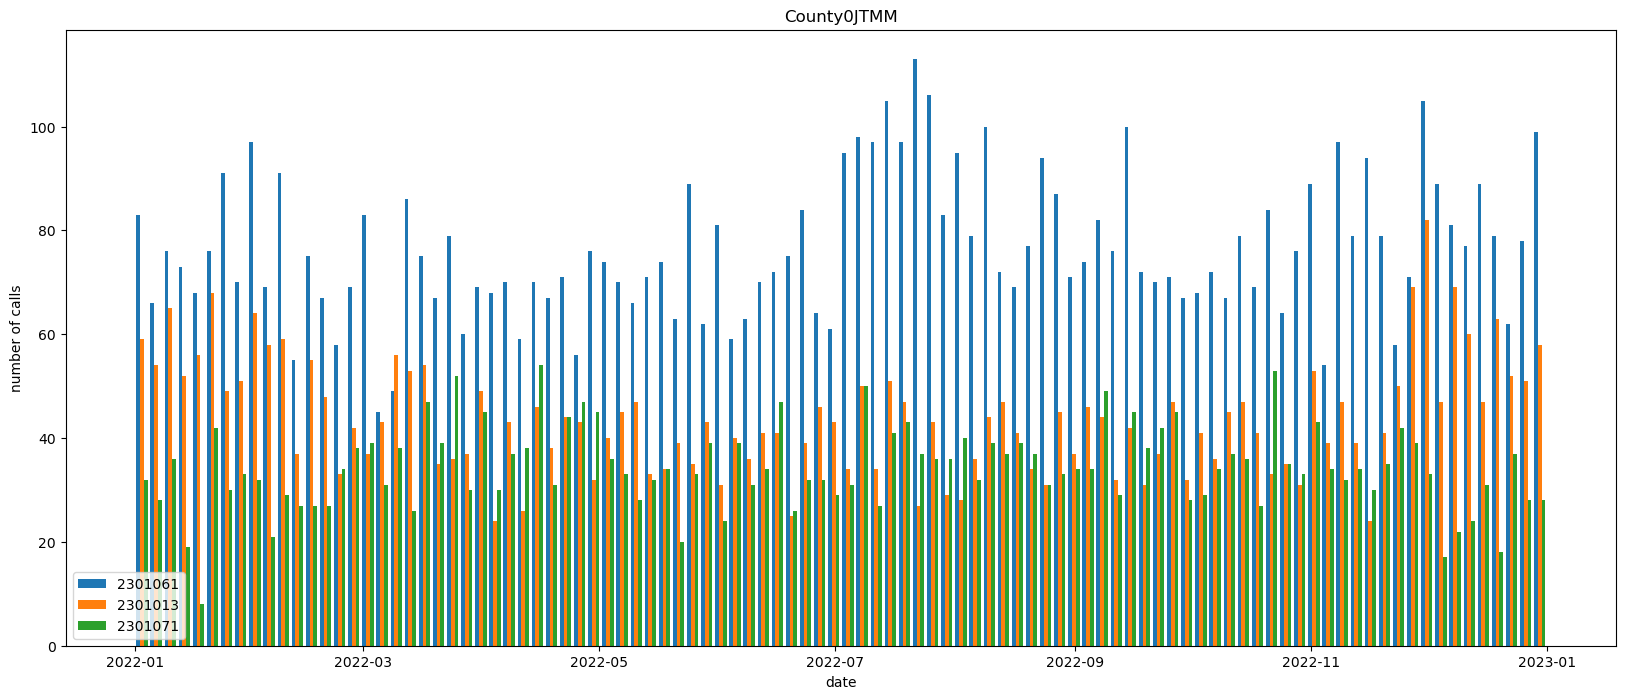

In [18]:
beep = []
labels = []
numTypes = 3

codes = county['eDispatch_01'].value_counts().index 
counts = county['eDispatch_01'].value_counts().to_list() #actually not sure we need this

for i in range(numTypes):
    beep.append(county.loc[(county.eDispatch_01 == codes[i]), 'Notified'])    
    labels.append(codes[i])


plt.figure(figsize=(20,8))
plt.title("County" + countyCode)
plt.ylabel('number of calls')
plt.xlabel('date')
plt.hist(beep, bins=100, histtype='bar', label=labels)
plt.legend(loc='lower left')
plt.show()



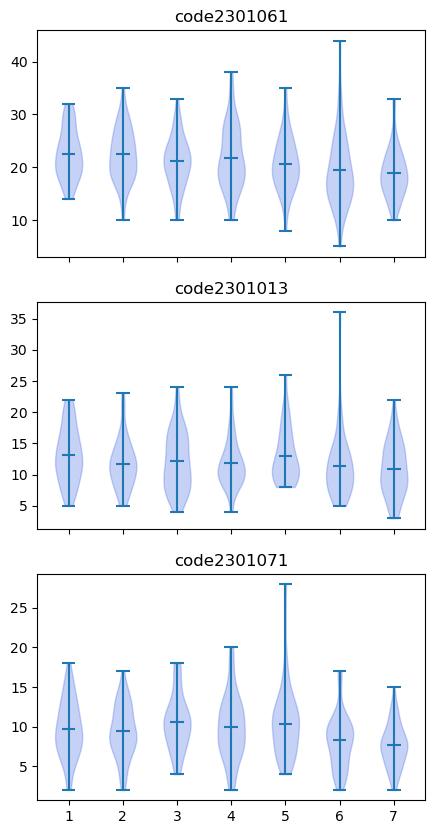

In [22]:
#Repeat this analysis but at the week level
#one violinplot for each call type up to numtypes
fig, axs = plt.subplots(numTypes,sharex=True,figsize = (5,10))

plt.subplots_adjust(wspace=0.25, hspace=.2)
beep = []

for i in range(numTypes):
    #build a violinplot for this type of call

    df_w=county.loc[county.eDispatch_01 == codes[i]].groupby(by='WeekNum').WeekDay.value_counts().unstack() #number of calls each day of the week, one row for each week of the year    
    data = [df_w[weekday].tolist() for weekday in [0,1,2,3,4,5,6]]


    for j in stupid:
        data[j] = [number if number == number else 0 for number in data[j]]  

    parts = axs[i].violinplot(data, showmeans = True)
    axs[i].set_title('code' + str(codes[i]))
    for pc in parts['bodies']:
        pc.set_facecolor('royalblue')
        pc.set_edgecolor('royalblue')

